# CNN Demo to distinguish between classes of apparels 

## Fashion MNIST dataset

In [16]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [17]:
#Display as text
from IPython.display import display
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 24)
pd.set_option('display.max_rows', 20)

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0,0,74,189,212,191,175,172,175,181,...,210,210,211,188,188,194,192,216,170,0
24,2,0,0,0,66,200,222,237,239,242,...,182,182,181,176,166,168,99,58,0,0
25,0,0,0,0,0,0,0,40,61,44,...,0,0,0,0,0,0,0,0,0,0
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Image (#90): Which is digit '9'


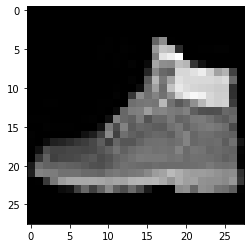

In [18]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 # Change to choose new article
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

### Check a few images

<Figure size 432x288 with 0 Axes>

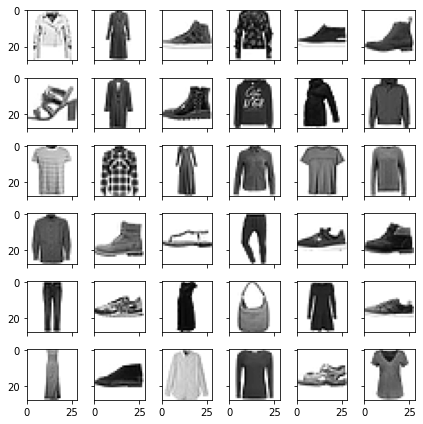

In [19]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

### Training/Fitting CNN - Fashion

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

Reshape input data

When using the tensorflow backend, you must explicitly declare a dimension for the depth of the input image. 
E.g. a full-color image with all 3 RGB channels will have a depth of 3.

Our MNIST images only have a depth of 1, but we must explicitly declare that. 

In other words, we want to transform our dataset from having shape (n, width, height) to (n, width, height, channel).

In [21]:
# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [22]:
x_train = x_train.astype('float32')/255  # this is just to normalize the data. 
x_test = x_test.astype('float32')/255

In [23]:
# convert class vectors to binary class matrices
num_classes=10
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [24]:
input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout is a technique used to prevent a model from overfitting. 
# Dropout randomly sets the outgoing edges of hidden units to 0 at each update of the training phase.
model.add(Flatten()) # A flatten layer collapses the spatial dimensions of the input into the channel dimension.
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [25]:
import tensorflow as tf
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(elapsed_time))

Epoch 1/5
469/469 - 67s - loss: 0.5249 - accuracy: 0.8148 - val_loss: 0.3402 - val_accuracy: 0.8838
Epoch 2/5
469/469 - 63s - loss: 0.3464 - accuracy: 0.8763 - val_loss: 0.2834 - val_accuracy: 0.8965
Epoch 3/5
469/469 - 66s - loss: 0.2935 - accuracy: 0.8939 - val_loss: 0.2600 - val_accuracy: 0.9052
Epoch 4/5
469/469 - 61s - loss: 0.2625 - accuracy: 0.9035 - val_loss: 0.2517 - val_accuracy: 0.9092
Epoch 5/5
469/469 - 64s - loss: 0.2365 - accuracy: 0.9126 - val_loss: 0.2315 - val_accuracy: 0.9169
Test loss: 0.23153315484523773
Test accuracy: 0.9168999791145325
Elapsed time: 324.5158619880676


#### Understand the keras parameters for CNN
https://www.kaggle.com/onlyshadow/deep-learning-cnn-with-keras-explanation